# ANN/MLP จำแนกชนิดดอก Iris (Classification)
Artificial Neural Network ด้วย MLP Scikit-learn จำแนกดอก Iris (3 Class)

- ตรวจสอบข้อมูลสูญหาย (Missing Values)
- เข้ารหัส Label Encoding เปลี่ยน Label ให้เป็นตัวเลข
- ปรับสเกลข้อมูล (Feature scaling)
- Train & Evaluate
- Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = sns.load_dataset('iris')
df.head()
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,versicolor
14,5.8,4.0,1.2,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
55,5.7,2.8,4.5,1.3,versicolor
53,5.5,2.3,4.0,1.3,versicolor


In [3]:
df.isnull().sum()   # มี Missing values?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
pd.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Label Encoding


In [5]:
y, class_names = pd.factorize(df.species, sort=True) 

In [6]:
y[40:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [7]:
class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [8]:
pd.unique(y)

array([0, 1, 2], dtype=int64)

## Data Visualization

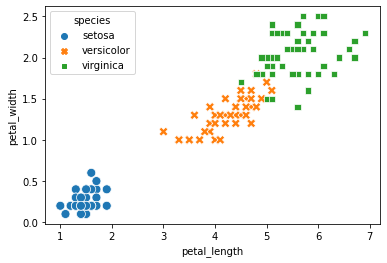

In [9]:
sns.scatterplot(x='petal_length', y ='petal_width', data=df, hue='species', style='species', s=80)
plt.show()

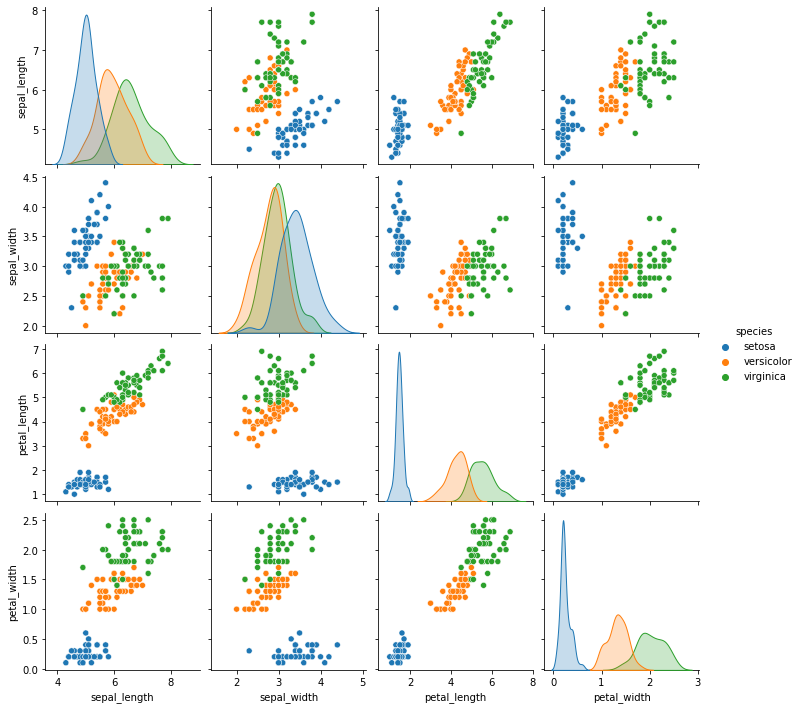

In [10]:
sns.pairplot(df, hue='species')
plt.show()

## Feature Scaling

In [11]:
X = df.drop('species', axis=1)   # Feature
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Cross validation

In [13]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# model = SVC(kernel='linear') # 
# model = SVC() # 
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 4 5 50

cvs = cross_val_score(model, X_sc, y, cv=5)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.97 1.   0.93 0.93 1.  ]
Average (%) = 96.67


## Train-test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=20) # 1

len(X_train),len(X_test)

(112, 38)

In [15]:
X_train[:5]

array([[ 0.67450115,  0.32841405,  0.42173371,  0.3957741 ],
       [ 1.88617985, -0.59237301,  1.33113254,  0.92230284],
       [-0.17367395, -0.59237301,  0.42173371,  0.13250973],
       [ 0.31099753, -1.05276654,  1.0469454 ,  0.26414192],
       [-1.14301691,  1.24920112, -1.34022653, -1.44707648]])

In [16]:
y_train[:5]

array([1, 2, 1, 2, 0], dtype=int64)

## Model

In [17]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=50, max_iter=2000, random_state=1)

In [18]:
[coef.shape for coef in model.coefs_]

[(4, 50), (50, 3)]

## Loss Curve

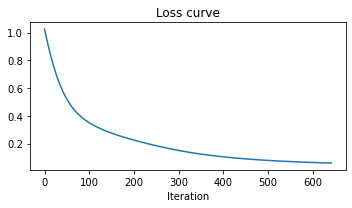

In [19]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

## Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

Score -> 0.9211
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.82      1.00      0.90        14
   virginica       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


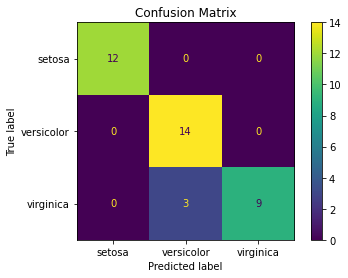

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [22]:
# X_new = [[5.1, 3.5, 3.4, 1.4]]
# X_new = [[6.7, 3.5, 6.3, 1.8]] 

X_new = [[6.1, 3.5, 3.9, 1.6]]

X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.31099753, 1.01900435, 0.08070915, 0.52740629]])

In [23]:
y_pred = model.predict(X_new_sc)
y_pred

array([1], dtype=int64)

In [24]:
print(class_names[y_pred][0])

versicolor


## Decision Regions

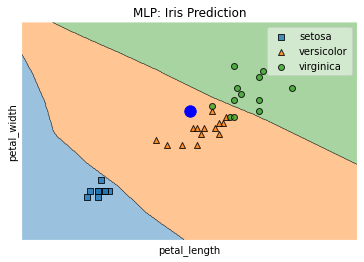

In [25]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(X_test, np.array(y_test), clf=model, feature_index=[2, 3],  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('MLP: Iris Prediction')

plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2], X_new_sc[:,3], marker='o', s=130, c='b')
plt.show()

In [26]:
# PCA (Principal component analysis)
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.25, random_state=20)  # 20 1

model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=50, max_iter=2000, random_state=1)

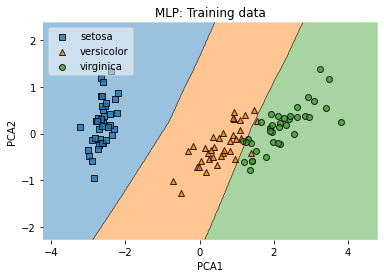

In [27]:
# Training data points
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_train), y_train,   # <<---
                      clf=model, legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('MLP: Training data')
plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

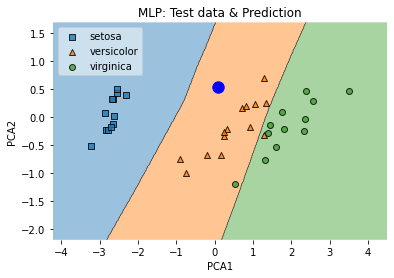

In [28]:
# Test data points and prediction
# from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test,   # <<--- 
                      clf=model, legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('MLP: Test data & Prediction')
plt.scatter(X_new_sc[:,2], X_new_sc[:,3], marker='o', s=130, c='b')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# ปัญหา Missing value 
Train-test -> จำลองทำให้ข้อมูลมี Missing Values (NaN) 

In [41]:
X_train[:5]

array([[ 0.01801515,  0.31833364],
       [ 2.84167278,  0.37526917],
       [ 0.64166908, -0.41824687],
       [ 1.78129481, -0.49990168],
       [-2.80068412,  0.26864374]])

In [42]:
X_train[0][0] = np.nan

In [43]:
X_train[:5]

array([[        nan,  0.31833364],
       [ 2.84167278,  0.37526917],
       [ 0.64166908, -0.41824687],
       [ 1.78129481, -0.49990168],
       [-2.80068412,  0.26864374]])

In [44]:
np.isnan(X_train).sum()  # Missing Value 

1

In [50]:
# Train the model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=50, max_iter=2000, random_state=1)

In [51]:
np.nanmean(X_train, axis=0)   # หาค่าเฉลี่ย

array([0.01795281, 0.03851572])

In [47]:
X_train[0][0] = 0.0249977       # เติมค่าเฉลี่ยแทนที่ Missing Value (NaN)

In [48]:
X_train[0][0] = np.nanmean(X_train, axis=0)[0]

In [49]:
X_train[:5]

array([[ 0.01801515,  0.31833364],
       [ 2.84167278,  0.37526917],
       [ 0.64166908, -0.41824687],
       [ 1.78129481, -0.49990168],
       [-2.80068412,  0.26864374]])

In [ ]:
# Train the model

In [ ]:
## test

In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
np.nanmean(X, axis=0)

In [ ]:
X_train[:,0]# .shape

In [ ]:
np.nanmean(X_train[:,0])

In [ ]:
df.loc[0,'sepal_length'] = None

In [ ]:
df.describe()
df.head(4)

In [ ]:
df.isnull().sum()

In [ ]:
# re-run above code